# **0.IMPORTING REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# **1.READ DATA**

In [ ]:
df=pd.read_csv("/content/Midterm_Classification_Data.csv")

In [ ]:
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Class
0,-3.289230,-4.855544,0.341247,-0.221237,-3.973732,2.869430,1.735610,-1.166484,1.363457,0.676433,...,1.036269,-1.200537,-0.038921,-1.487769,2.307366,0.090613,-0.164243,-1.430395,-4.626856,3.0
1,-3.141337,0.169831,4.358331,1.012794,2.056997,0.052965,1.441045,-1.442399,3.230971,-0.558615,...,0.208990,2.034339,1.267559,-0.790569,0.426526,-2.345973,1.112882,2.479138,-3.639002,3.0
2,10.669222,13.418269,1.206290,-1.090091,3.601008,-0.687960,-5.841531,2.464296,1.596744,0.523296,...,-0.510399,-0.692411,0.693951,4.853606,-0.402598,-0.404670,-3.102704,0.511660,6.252209,1.0
3,-0.002263,4.314376,1.337525,-1.341995,-1.491038,1.912099,-0.805146,1.284336,0.171927,1.289077,...,-1.130262,0.144282,-0.837355,0.791508,0.522174,0.188847,1.584875,-2.342938,-3.179510,4.0
4,0.777449,0.169126,1.063936,-3.153383,-2.008602,0.890053,0.333120,0.682044,2.052451,0.078742,...,2.146298,-1.643204,0.371123,0.228687,1.694068,-2.088182,-0.624012,-0.179276,-1.936173,4.0


# **2.Checking Null Values**

In [ ]:
df.dtypes

Feature_1     float64
Feature_2     float64
Feature_3     float64
Feature_4     float64
Feature_5     float64
Feature_6     float64
Feature_7     float64
Feature_8     float64
Feature_9     float64
Feature_10    float64
Feature_11    float64
Feature_12    float64
Feature_13    float64
Feature_14    float64
Feature_15    float64
Feature_16    float64
Feature_17    float64
Feature_18    float64
Feature_19    float64
Feature_20    float64
Class         float64
dtype: object

In [ ]:
df['Class'].value_counts()

1.0    4015
2.0    4001
3.0    3996
0.0    3996
4.0    3992
Name: Class, dtype: int64

In [ ]:
null_counts = df.isnull().sum(axis=0)
print(null_counts)

Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Class         0
dtype: int64


# **3.PLOTTING THE DATA**

In [ ]:
def scatter_plots(df, feature_columns, target_column):
    num_features = len(feature_columns)
    num_rows = (num_features + 1) // 2  # Calculate the number of rows needed
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

    for i in range(num_rows):
        for j in range(2):
            index = i * 2 + j
            if index < num_features:
                feature_column = feature_columns[index]
                axes[i, j].scatter(df[feature_column], df[target_column])
                axes[i, j].set_title(f'{feature_column} vs {target_column}')
            else:
                # If there are unused subplots, remove them
                fig.delaxes(axes[i, j])

    plt.tight_layout()
    plt.show()

In [ ]:
feature_columns=df.columns[:-1].tolist()
target_column=df.columns[-1]

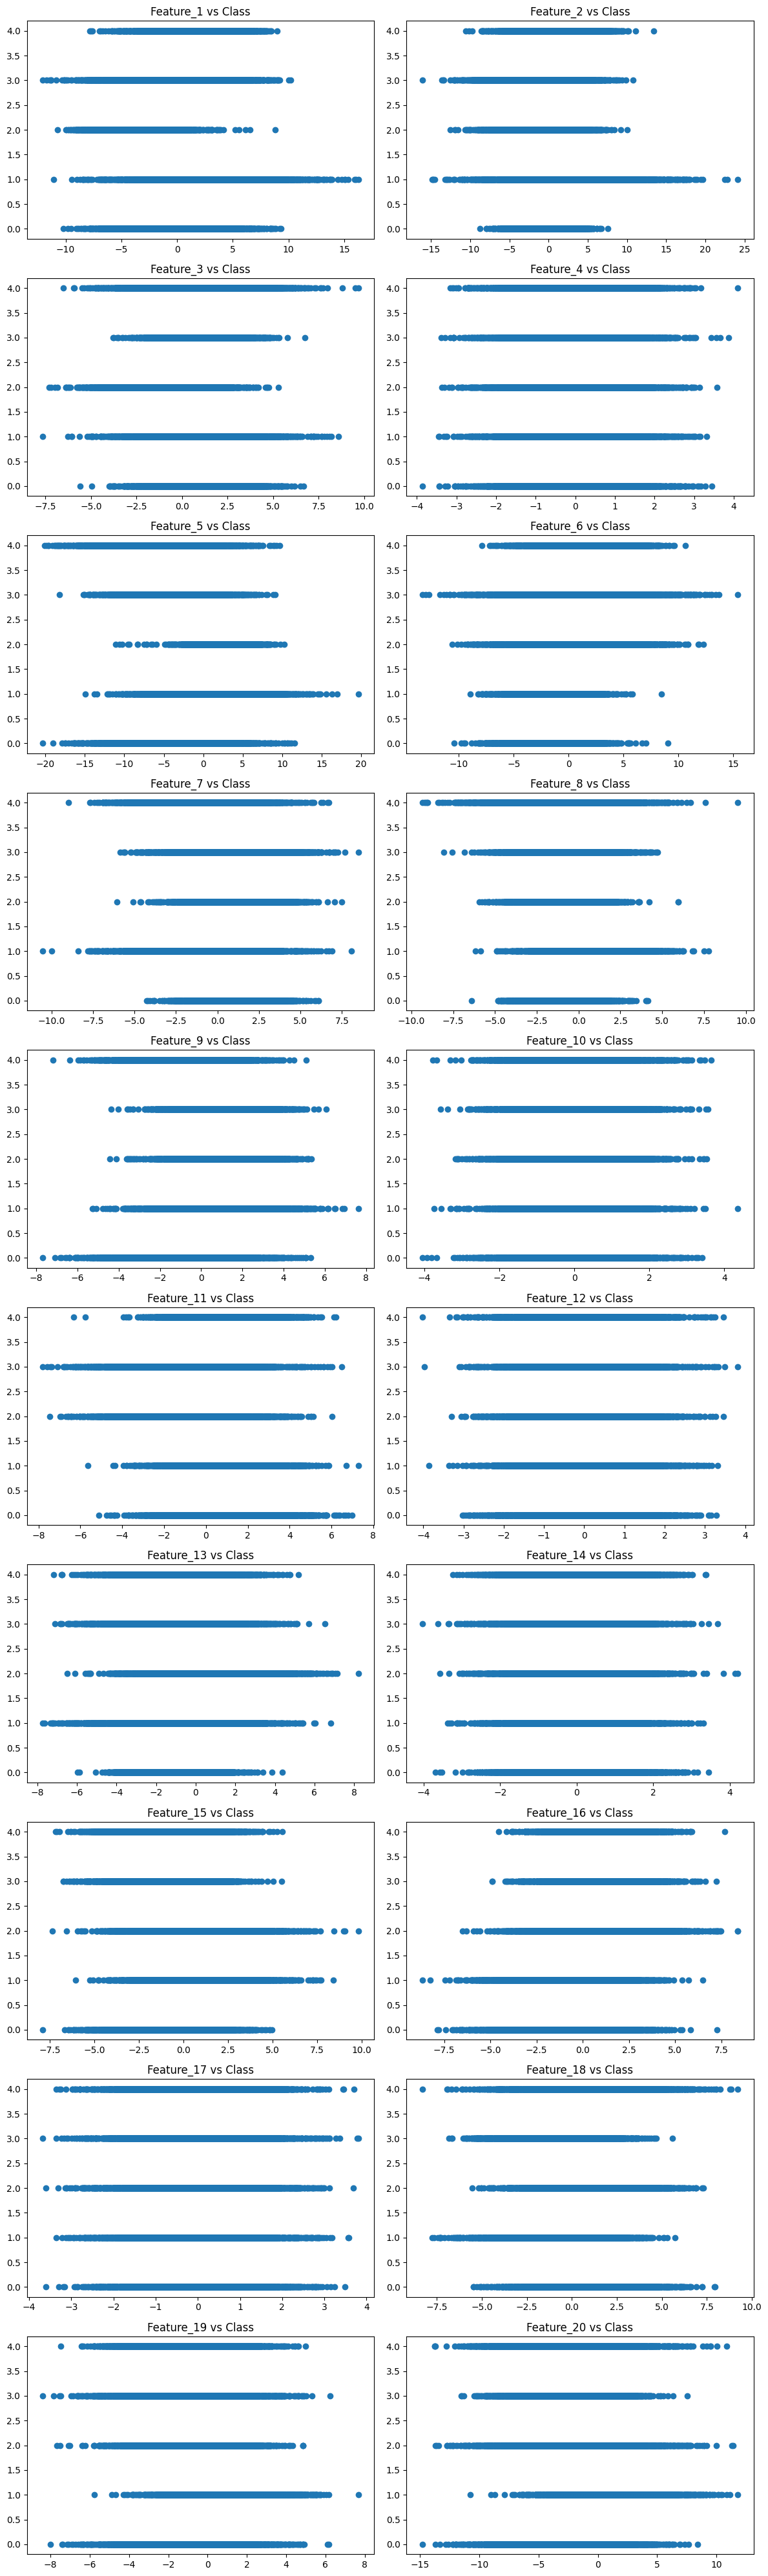

In [ ]:
scatter_plots(df,feature_columns,target_column)

In [ ]:
df.corr()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Class
Feature_1,1.000000,0.680447,0.366261,-0.006594,-0.381806,-0.185579,-0.592680,0.092183,-0.140792,0.000947,...,-0.001998,-0.403302,0.006081,0.169143,-0.072881,-0.005905,-0.602554,0.037504,0.441886,0.007025
Feature_2,0.680447,1.000000,0.458141,-0.004976,-0.062791,-0.013665,-0.617022,0.208063,0.052485,-0.003623,...,0.000723,0.026039,0.006688,0.401148,-0.163571,-0.004209,-0.228894,-0.260369,0.156576,-0.036949
Feature_3,0.366261,0.458141,1.000000,-0.007045,-0.558372,0.022414,-0.059956,0.014562,0.059934,-0.006028,...,0.000789,-0.068567,0.000689,-0.255603,0.032904,-0.002929,-0.133483,-0.135142,-0.330149,0.005751
Feature_4,-0.006594,-0.004976,-0.007045,1.000000,0.006137,-0.000235,0.006402,0.007661,0.003869,0.011127,...,-0.007888,-0.002949,-0.001592,0.008979,0.008874,0.002743,0.004492,0.001698,-0.000203,0.004855
Feature_5,-0.381806,-0.062791,-0.558372,0.006137,1.000000,-0.154767,0.026731,0.207583,0.462450,0.001020,...,-0.000210,0.329491,0.002298,0.526419,-0.319450,-0.000923,0.126518,0.382613,0.296338,-0.243912
Feature_6,-0.185579,-0.013665,0.022414,-0.000235,-0.154767,1.000000,-0.399568,0.219077,0.154895,0.001776,...,0.003010,0.402021,0.007075,-0.530948,0.474236,0.002448,0.107661,-0.095616,-0.109551,0.359065
Feature_7,-0.592680,-0.617022,-0.059956,0.006402,0.026731,-0.399568,1.000000,-0.067801,-0.008273,0.006853,...,-0.004856,0.100723,-0.012630,-0.078366,0.024830,0.006684,0.062299,-0.094769,-0.272102,-0.141183
Feature_8,0.092183,0.208063,0.014562,0.007661,0.207583,0.219077,-0.067801,1.000000,0.151079,0.016501,...,-0.003701,0.108517,0.005164,-0.103533,-0.180832,0.004146,-0.208284,0.060761,0.255844,-0.143718
Feature_9,-0.140792,0.052485,0.059934,0.003869,0.462450,0.154895,-0.008273,0.151079,1.000000,0.004270,...,-0.004845,0.033362,0.000372,0.119551,-0.096929,-0.001028,-0.233597,0.139158,-0.140477,0.016309
Feature_10,0.000947,-0.003623,-0.006028,0.011127,0.001020,0.001776,0.006853,0.016501,0.004270,1.000000,...,0.006573,0.002340,0.005892,-0.006795,-0.001006,0.016846,-0.011852,0.000026,0.008113,0.004136


<Axes: >

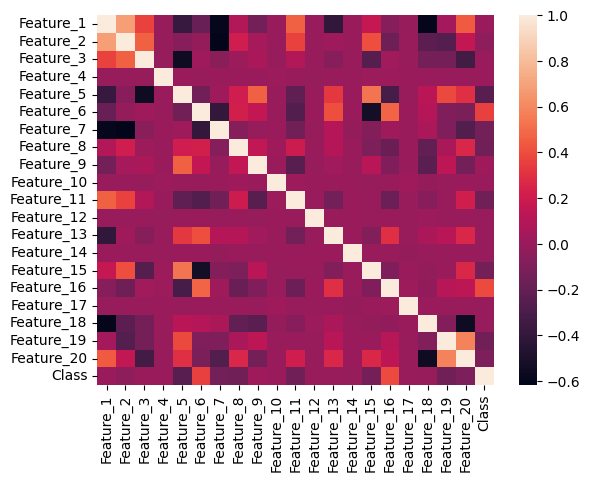

In [ ]:
sns.heatmap(df.corr(method="pearson"))

<Axes: >

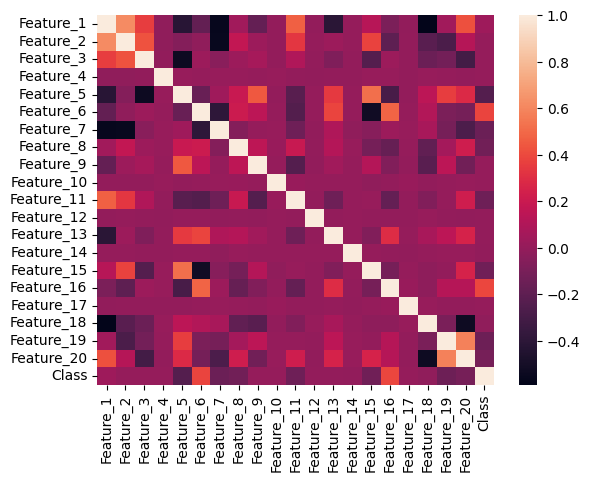

In [ ]:
sns.heatmap(df.corr(method="spearman"))

True

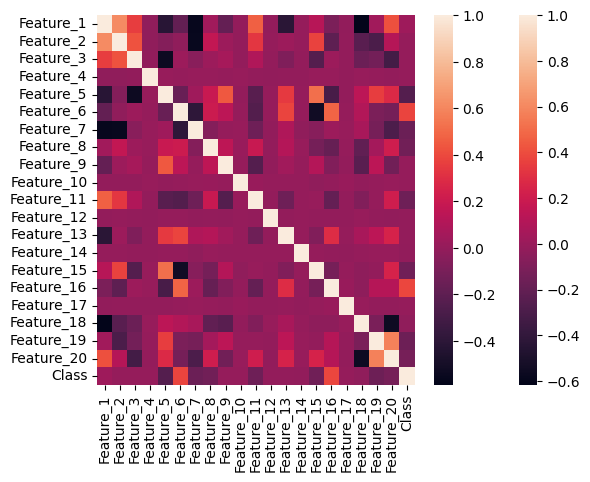

In [ ]:
sns.heatmap(df.corr(method="pearson"))==sns.heatmap(df.corr(method="spearman"))

# **4.REMOVING OUTLIERS**

In [ ]:
def remove_outliers_iqr(data, feature_columns, target_column, threshold=1.5):
    cleaned_data = data.copy()

    for feature_column in feature_columns:
        Q1 = data[feature_column].quantile(0.25)
        Q3 = data[feature_column].quantile(0.75)
        IQR = Q3 - Q1

        lower_fence = Q1 - threshold * IQR
        upper_fence = Q3 + threshold * IQR

        cleaned_data = cleaned_data[(cleaned_data[feature_column] >= lower_fence) & (cleaned_data[feature_column] <= upper_fence)]

    return cleaned_data

In [ ]:
cleaned_data_iqr = remove_outliers_iqr(df, feature_columns, target_column)

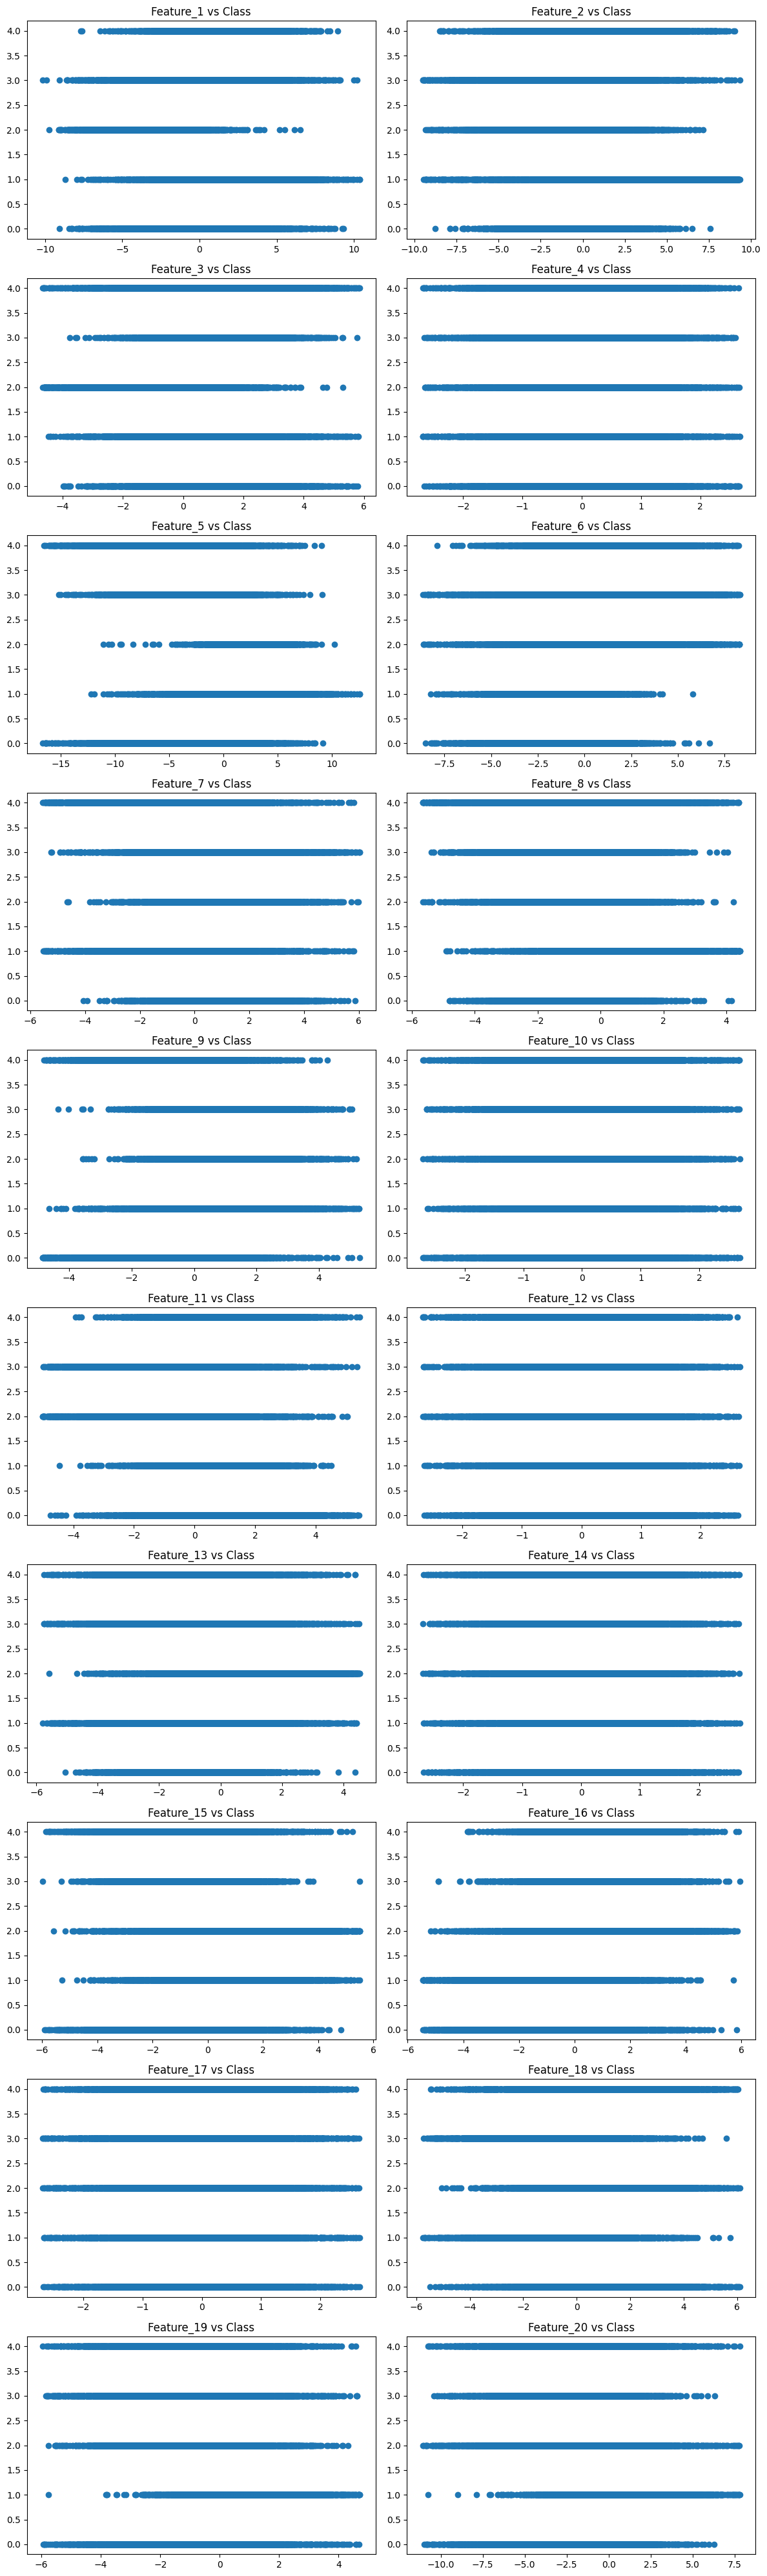

In [ ]:
scatter_plots(cleaned_data_iqr,feature_columns,target_column)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_1   20000 non-null  float64
 1   Feature_2   20000 non-null  float64
 2   Feature_3   20000 non-null  float64
 3   Feature_4   20000 non-null  float64
 4   Feature_5   20000 non-null  float64
 5   Feature_6   20000 non-null  float64
 6   Feature_7   20000 non-null  float64
 7   Feature_8   20000 non-null  float64
 8   Feature_9   20000 non-null  float64
 9   Feature_10  20000 non-null  float64
 10  Feature_11  20000 non-null  float64
 11  Feature_12  20000 non-null  float64
 12  Feature_13  20000 non-null  float64
 13  Feature_14  20000 non-null  float64
 14  Feature_15  20000 non-null  float64
 15  Feature_16  20000 non-null  float64
 16  Feature_17  20000 non-null  float64
 17  Feature_18  20000 non-null  float64
 18  Feature_19  20000 non-null  float64
 19  Feature_20  20000 non-nul

In [ ]:
cleaned_data_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17050 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_1   17050 non-null  float64
 1   Feature_2   17050 non-null  float64
 2   Feature_3   17050 non-null  float64
 3   Feature_4   17050 non-null  float64
 4   Feature_5   17050 non-null  float64
 5   Feature_6   17050 non-null  float64
 6   Feature_7   17050 non-null  float64
 7   Feature_8   17050 non-null  float64
 8   Feature_9   17050 non-null  float64
 9   Feature_10  17050 non-null  float64
 10  Feature_11  17050 non-null  float64
 11  Feature_12  17050 non-null  float64
 12  Feature_13  17050 non-null  float64
 13  Feature_14  17050 non-null  float64
 14  Feature_15  17050 non-null  float64
 15  Feature_16  17050 non-null  float64
 16  Feature_17  17050 non-null  float64
 17  Feature_18  17050 non-null  float64
 18  Feature_19  17050 non-null  float64
 19  Feature_20  17050 non-nul

# **5.DATASET SPLIT, MODEL NORMALIZATION, REGULARIZATION, TRAINING, TUNING**

In [ ]:
def normalize_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    return X_train_normalized, X_test_normalized

In [ ]:
X=cleaned_data_iqr[feature_columns]
y=cleaned_data_iqr.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10], 'penalty': ['l2']},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}


In [ ]:
# Normalize data
X_train, X_test = normalize_data(X_train, X_test)

In [ ]:
results = {}
best_accuracy = 0.0
best_model = None
best_params = None

In [ ]:
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    search = GridSearchCV(model, param_grid, scoring='precision', cv=5)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        search.fit(X_train, y_train)
    y_pred = search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    results[model_name] = {'best_model': search.best_estimator_, 'accuracy': accuracy,
                           'classification_report': report, 'confusion_matrix': conf_matrix,'y_pred':y_pred}

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = search.best_estimator_
        best_params = search.best_params_

In [160]:
report

'              precision    recall  f1-score   support\n\n         0.0       0.75      0.91      0.83       745\n         1.0       0.92      0.90      0.91       599\n         2.0       0.87      0.93      0.90       661\n         3.0       0.90      0.83      0.86       718\n         4.0       0.95      0.76      0.84       687\n\n    accuracy                           0.86      3410\n   macro avg       0.88      0.87      0.87      3410\nweighted avg       0.87      0.86      0.87      3410\n'

In [164]:
# Write model performances to a log file
with open("model_performance.log", 'w') as log_file:
        log_file.write(f"Best Model: {best_model}\n")
        log_file.write(f"Best Parameters: {best_params}\n\n")
        for model_name, result in results.items():
            log_file.write(f"Model: {model_name}\n")
            log_file.write(f"Accuracy: {result['accuracy']}\n")
            log_file.write(f"Classification Report:\n{result['classification_report']}\n\n")

            log_file.write(f"Confusion Matrix:\n")
            log_file.write(f"                  Predicted NO     Predicted YES\n")
            log_file.write(f"Actual NO         {result['confusion_matrix'][0, 0]:<10}     {result['confusion_matrix'][0, 1]:<10}\n")
            log_file.write(f"Actual YES        {result['confusion_matrix'][1, 0]:<10}     {result['confusion_matrix'][1, 1]:<10}\n\n")

Model: Logistic Regression



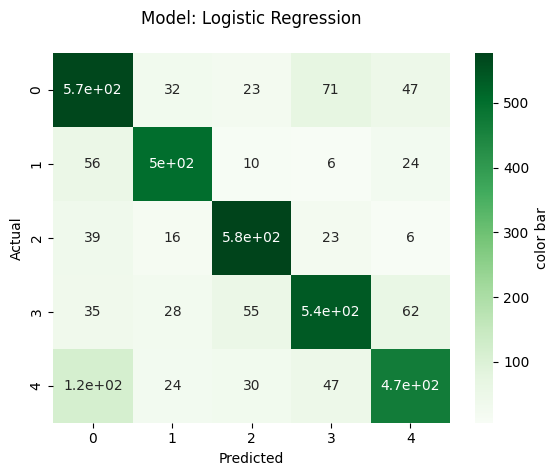

Model: Decision Tree



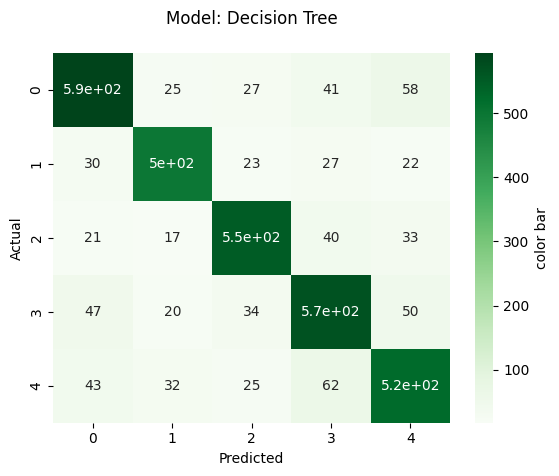

Model: Random Forest



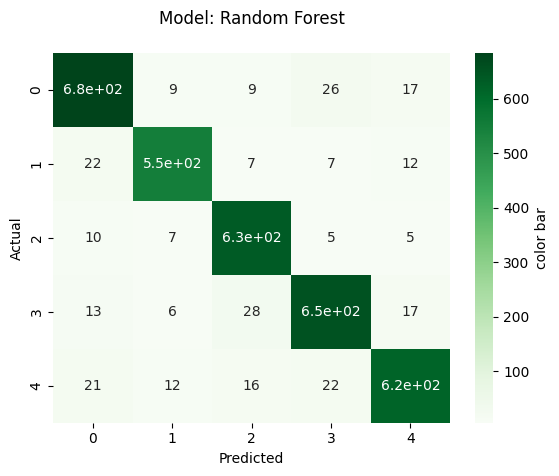

Model: SVM



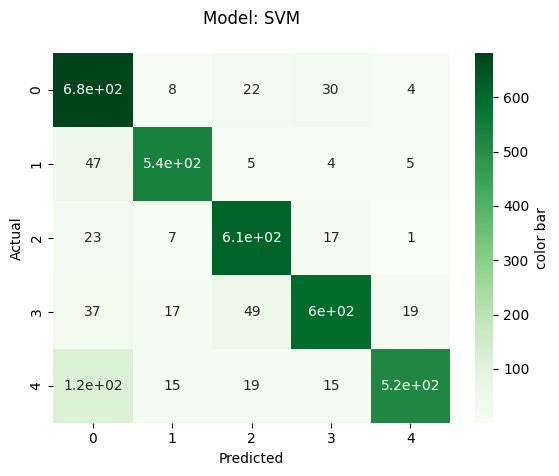

In [ ]:
for model_name, result in results.items():
  print(f"Model: {model_name}\n")
  sns.heatmap(result['confusion_matrix'],cmap="Greens",annot=True,
              cbar_kws={"orientation":"vertical","label":"color bar"},
              )
  plt.title(f"Model: {model_name}\n")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

In [ ]:
print(results)

{'Logistic Regression': {'best_model': LogisticRegression(C=0.1), 'accuracy': 0.7797653958944282, 'classification_report': '              precision    recall  f1-score   support\n\n         0.0       0.70      0.77      0.73       745\n         1.0       0.83      0.84      0.84       599\n         2.0       0.83      0.87      0.85       661\n         3.0       0.79      0.75      0.77       718\n         4.0       0.77      0.68      0.72       687\n\n    accuracy                           0.78      3410\n   macro avg       0.78      0.78      0.78      3410\nweighted avg       0.78      0.78      0.78      3410\n', 'confusion_matrix': array([[572,  32,  23,  71,  47],
       [ 56, 503,  10,   6,  24],
       [ 39,  16, 577,  23,   6],
       [ 35,  28,  55, 538,  62],
       [117,  24,  30,  47, 469]]), 'y_pred': array([4., 1., 4., ..., 0., 4., 0.])}, 'Decision Tree': {'best_model': DecisionTreeClassifier(), 'accuracy': 0.8014662756598241, 'classification_report': '              pre

In [ ]:
best_accuracy

0.9228739002932551

In [ ]:
conf_matrix

array([[681,   8,  22,  30,   4],
       [ 47, 538,   5,   4,   5],
       [ 23,   7, 613,  17,   1],
       [ 37,  17,  49, 596,  19],
       [117,  15,  19,  15, 521]])

In [ ]:
for model_name, result in results.items():
  TP = result['confusion_matrix'][1, 1]
  FP = result['confusion_matrix'][0, 1]
  TN = result['confusion_matrix'][0, 0]
  FN = result['confusion_matrix'][1, 0]

  print(f"Model: {model_name}\n")
  print(f"True Positives: {TP}\n")
  print(f"False Positives: {FP}\n")
  print(f"True Negatives: {TN}\n")
  print(f"False Negatives: {FN}\n\n")

Model: Logistic Regression

True Positives: 503

False Positives: 32

True Negatives: 572

False Negatives: 56


Model: Decision Tree

True Positives: 497

False Positives: 25

True Negatives: 594

False Negatives: 30


Model: Random Forest

True Positives: 551

False Positives: 9

True Negatives: 684

False Negatives: 22


Model: SVM

True Positives: 538

False Positives: 8

True Negatives: 681

False Negatives: 47




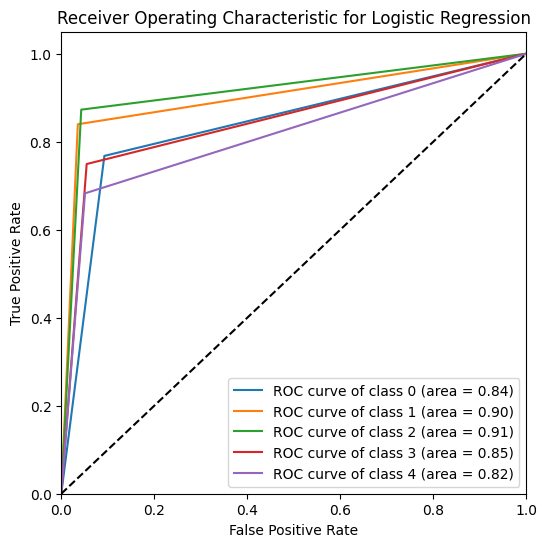

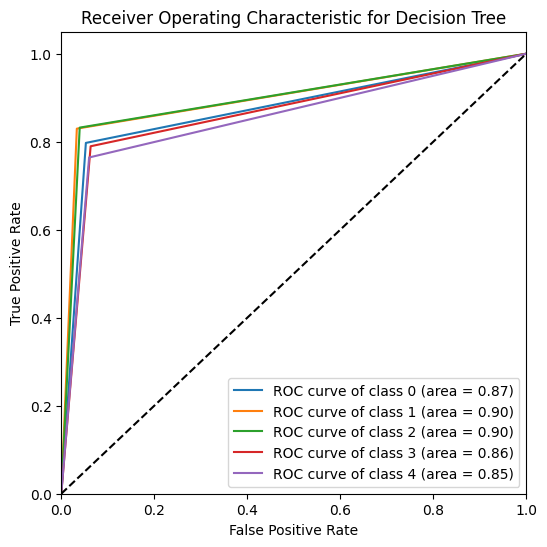

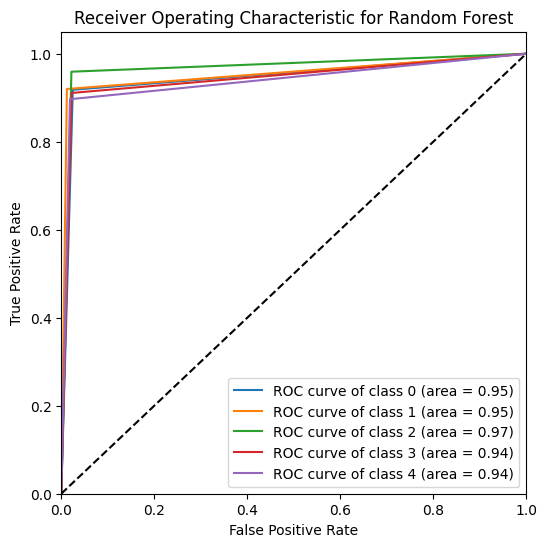

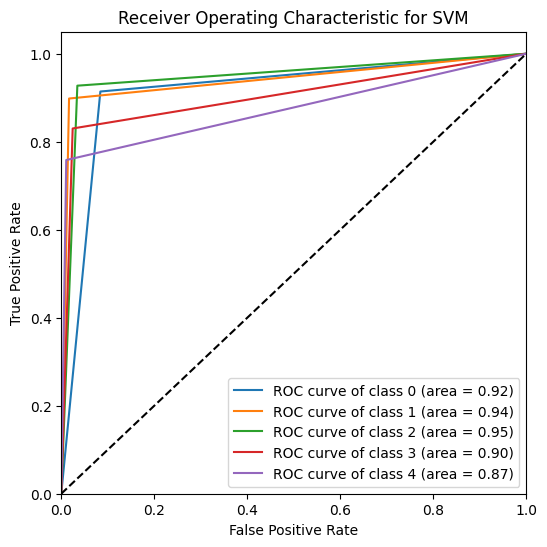

In [166]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

roc_auc = {}

# Binarize the labels
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_train)

y_test_binarized = label_binarizer.transform(y_test)

# Compute ROC curve and AUC for each class
n_classes = len(label_binarizer.classes_)

for model_name, result in results.items():
    plt.figure(figsize=(6, 6))

    y_pred = results[model_name]['y_pred']
    y_pred_binarized = label_binarizer.transform(y_pred)

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
        roc_auc[model_name,i]=auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'ROC curve of class {i} (area = {auc(fpr, tpr):.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()


In [159]:
roc_auc

{('Logistic Regression', 0): 0.8375511540350302,
 ('Logistic Regression', 1): 0.902079179754708,
 ('Logistic Regression', 2): 0.9149975592830071,
 ('Logistic Regression', 3): 0.847348690228346,
 ('Logistic Regression', 4): 0.8158158358818433,
 ('Decision Tree', 0): 0.8722036843496983,
 ('Decision Tree', 1): 0.8981380683684239,
 ('Decision Tree', 2): 0.8962109175720068,
 ('Decision Tree', 3): 0.8632717595102791,
 ('Decision Tree', 4): 0.852165845851368,
 ('Random Forest', 0): 0.9466776634725562,
 ('Random Forest', 1): 0.9538855521683536,
 ('Random Forest', 2): 0.9686633401005674,
 ('Random Forest', 3): 0.944287624116851,
 ('Random Forest', 4): 0.9389613839945562,
 ('SVM', 0): 0.9150207134492615,
 ('SVM', 1): 0.9407217887751969,
 ('SVM', 2): 0.946412366152676,
 ('SVM', 3): 0.902783238896224,
 ('SVM', 4): 0.8738598525365624}